# parameters generated using getScalar()_ HTM Univariate

In [1]:
import numpy as np
import pandas as pd
import json
import datetime
import matplotlib.pyplot as plt 

# from tqdm import tqdm_notebook
# import time

## Load Data
Load Data and Groundtruth labels:

In [2]:
PATH_relative = 'realKnownCause/machine_temperature_system_failure.csv'

In [3]:
df = pd.read_csv('../data/NAB/' + PATH_relative) #parse_dates=True
with open('../labels/NAB/combined_windows.json') as f:
    labels = json.loads(f.read())

In [4]:
df[0:5]

,timestamp,value
0,datetime,float
1,T,NaN
2,2013-12-02 21:15:00,73.96732207
3,2013-12-02 21:20:00,74.93588199999998
4,2013-12-02 21:25:00,76.12416182


In [5]:
df.drop([0,1], inplace=True)
df.reset_index(drop=True, inplace=True)
df['value'] = pd.to_numeric(df['value'])
df['timestamp'] = pd.to_datetime(df['timestamp'], format="%Y-%m-%d %H:%M:%S")

Groundtruth labels for anomaly

In [6]:
labels[PATH_relative]

[[u'2013-12-10 06:25:00.000000', u'2013-12-12 05:35:00.000000'],
 [u'2013-12-15 17:50:00.000000', u'2013-12-17 17:00:00.000000'],
 [u'2014-01-27 14:20:00.000000', u'2014-01-29 13:30:00.000000'],
 [u'2014-02-07 14:55:00.000000', u'2014-02-09 14:05:00.000000']]

In [7]:
df['labels'] = np.zeros_like(df.value)

# set values within the range = 1
for i in range(len(labels[PATH_relative])):
    df.loc[(df['timestamp'] >= labels[PATH_relative][i][0]) & 
           (df['timestamp'] <= labels[PATH_relative][i][1]), 'labels'] = 1

In [8]:
df[0:5]

,timestamp,value,labels
0,2013-12-02 21:15:00,73.967322,0.0
1,2013-12-02 21:20:00,74.935882,0.0
2,2013-12-02 21:25:00,76.124162,0.0
3,2013-12-02 21:30:00,78.140707,0.0
4,2013-12-02 21:35:00,79.329836,0.0


## Suggested Hyperparameters

- **load** `.json` parameters from `src/nupic/frameworks/opf/common_models/anomaly_params_random_encoder/best_single_metric_anomaly_params_tm_cpp.json`

## HTM Model

**Load** MODEL_PARAMS:

Best Parameters.
The fnc `getScalarMetricWithTimeOfDayAnomalyParams` should return the best parameters.
[link](http://nupic.docs.numenta.org/1.0.3/api/opf/utils.html?highlight=getscalarmetricwithtimeofdayanomalyparams).

In [ ]:
from nupic.

In [9]:
modelParams = getScalarMetricWithTimeOfDayAnomalyParams(df['value'],
                                                        minVal=df['value'].min(), 
                                                        maxVal=df['value'].max()
                                                       )

NameError: name 'getScalarMetricWithTimeOfDayAnomalyParams' is not defined

In [ ]:
modelParams

### Encoder



In [242]:
modelParams['modelConfig']['modelParams']['sensorParams']

{u'encoders': {u'c0_dayOfWeek': None,
  u'c0_timeOfDay': {u'fieldname': u'c0',
   u'name': u'c0',
   u'timeOfDay': [21, 9.49],
   u'type': u'DateEncoder'},
  u'c0_weekend': None,
  u'c1': {u'fieldname': u'c1',
   u'name': u'c1',
   'resolution': 0.81866016610769232,
   u'seed': 42,
   u'type': u'RandomDistributedScalarEncoder'}},
 u'sensorAutoReset': None,
 u'verbosity': 0}

In [240]:
data = df.to_dict(orient='records')
data[0:5]

[{'timestamp': Timestamp('2013-12-02 21:15:00'), 'value': 73.96732207},
 {'timestamp': Timestamp('2013-12-02 21:20:00'), 'value': 74.93588199999998},
 {'timestamp': Timestamp('2013-12-02 21:25:00'), 'value': 76.12416182},
 {'timestamp': Timestamp('2013-12-02 21:30:00'), 'value': 78.14070732},
 {'timestamp': Timestamp('2013-12-02 21:35:00'), 'value': 79.32983574}]

In [241]:
from nupic.frameworks.opf.common_models.cluster_params import (
  getScalarMetricWithTimeOfDayAnomalyParams)

In [134]:
for k,v in MODEL_PARAMS['modelConfig']['modelParams']['sensorParams']['encoders'].items():
    if v != None:
        print k, v, "\n"
    else: 
        print str(0), "\n" 

timeOfDay {'fieldname': 'timestamp', 'timeOfDay': [21, 9.49], 'type': 'DateEncoder', 'name': 'timestamp'} 

value {'maxval': 108, 'name': 'value', 'minval': 2, 'fieldname': 'value', 'numBuckets': 130.0, 'type': 'ScalarEncoder'} 



We need to build: 
- 1x 'DateEncoder' which encodes the field `timestamp`
- 1x 'ScalarEncoder' which encodes the field `value`

In [48]:
def remove_dict_key(d, keys):
    """
    Remove 'keys' in dict.
    
    Parameters
    ----------
    d: dict
    keys: list
        List containing key(s) to delete.
        
    Outputp
    -------
    new_d: dict
        A new dict object.
    
    """
    new_d = dict(d)
    for i in keys: 
        del new_d[i]
    return new_d

In [135]:
#from nupic.encoders.random_distributed_scalar import RandomDistributedScalarEncoder
from nupic.encoders.scalar import ScalarEncoder

In [136]:
vEnc = ScalarEncoder(w=21, minval=df['value'].min(), maxval=df['value'].max(),
                     resolution=modelParams['modelConfig']['modelParams']['sensorParams']['encoders']['c1']['resolution'])

print str(data[0]['value']) + " = ", vEnc.encode(data[0]['value'])
print str(data[1]['value']) + " = ", vEnc.encode(data[1]['value'])

73.96732207 =  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
74.935882 =  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


In [137]:
enc = vEnc.encode(75.123)
#print(enc)
vEnc.decode(enc)

({'[2.084721206:108.5105428]': ([[74.945475989584608, 74.945475989584608]],
   '74.95')},
 ['[2.084721206:108.5105428]'])

The scalar encoder proposed seems to be very precise for our data.  
`[2.084721206:108.5105428]` this is the *range* of our data.

In [10]:
import datetime
from nupic.encoders.date import DateEncoder

In [139]:
dEnc = DateEncoder(modelParams['modelConfig']['modelParams']['sensorParams']['encoders']['c0_timeOfDay']['timeOfDay']) 

print "Parameters: ", timestamp_weekend

# tsObs1 = datetime.datetime.strptime(data[0]['timestamp'], "%Y-%m-%d %H:%M:%S")
print "TimeStamp-obs0 = ", dEnc.encode(data[0]['timestamp'])
print "TimeStamp-obs1 = ", dEnc.encode(data[1]['timestamp'])

Parameters:  {'timeOfDay': [21, 9.49], 'name': 'timestamp'}
TimeStamp-obs0 =  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0

In [142]:
data[0]

{'timestamp': Timestamp('2013-12-02 21:15:00'), 'value': 73.96732207}

In [143]:
obs = []
inputVal = []
inputTs = []
label = []
inputSDRval = []
inputSDRts = []
inputSDR = []  # main
inputTsIdx = [0, len(dEnc.encode(data[0]['timestamp'])) - 1]
inputValIdx = [len(dEnc.encode(data[0]['timestamp'])), 
               len(dEnc.encode(data[0]['timestamp'])) + len(vEnc.encode(data[1]['value'])) - 1]

for i in xrange(len(data)):
    obs.append(i)
    inputTs.append(data[i]['timestamp'])  
    inputVal.append(data[i]['value'])   
    label.append(data[i]['labels'])
    inputSDRts.append(dEnc.encode(data[i]['timestamp']))
    inputSDRval.append(vEnc.encode(data[i]['value']))
    inputSDR.append(np.hstack((inputSDRts[i], inputSDRval[i])))  # combine the 2 ancoders in 1 enoder 
    
# send everything to dict    
data = pd.DataFrame({'inputVal':inputVal, 'inputTs':inputTs, 'label': label,
                      'inputSDR':inputSDR, 'inputSDRval':inputSDRval, 'inputSDRts':inputSDRts, 
                      #'inputValIdx1':inputValIdx1, 'inputVaIdx2':inputValIdx2
                     }, index=obs).to_dict(orient='records')

In [144]:
print "len(inputSDR): ", len(data[0]['inputSDR'])
print data[0]
print len(data)

len(inputSDR):  961
{'inputSDR': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

# Spatial Pooler
[link to wiki](http://nupic.docs.numenta.org/1.0.3/api/algorithms/spatial-pooling.html#nupic.algorithms.spatial_pooler.SpatialPooler)

Load `modelParams` fors SP:

In [145]:
from nupic.algorithms.spatial_pooler import SpatialPooler

In [149]:
modelParams

{u'inferenceArgs': {u'inputPredictedField': u'auto',
  u'predictedField': u'c1',
  u'predictionSteps': [1]},
 u'modelConfig': {u'aggregationInfo': {u'days': 0,
   u'fields': [],
   u'hours': 0,
   u'microseconds': 0,
   u'milliseconds': 0,
   u'minutes': 0,
   u'months': 0,
   u'seconds': 0,
   u'weeks': 0,
   u'years': 0},
  u'model': u'HTMPrediction',
  u'modelParams': {u'anomalyParams': {u'anomalyCacheRecords': None,
    u'autoDetectThreshold': None,
    u'autoDetectWaitRecords': 5030},
   u'clEnable': False,
   u'clParams': {u'alpha': 0.035828933612158,
    u'regionName': u'SDRClassifierRegion',
    u'steps': u'1',
    u'verbosity': 0},
   u'inferenceType': u'TemporalAnomaly',
   u'sensorParams': {u'encoders': {u'c0_dayOfWeek': None,
     u'c0_timeOfDay': {u'fieldname': u'c0',
      u'name': u'c0',
      u'timeOfDay': [21, 9.49],
      u'type': u'DateEncoder'},
     u'c0_weekend': None,
     u'c1': {u'fieldname': u'c1',
      u'name': u'c1',
      'resolution': 0.81866016610769232,

In [150]:
modelParams['modelConfig']['modelParams']['spParams']

{u'boostStrength': 0.0,
 u'columnCount': 2048,
 u'globalInhibition': 1,
 u'inputWidth': 0,
 u'numActiveColumnsPerInhArea': 40,
 u'potentialPct': 0.8,
 u'seed': 1956,
 u'spVerbosity': 0,
 u'spatialImp': u'cpp',
 u'synPermActiveInc': 0.003,
 u'synPermConnected': 0.2,
 u'synPermInactiveDec': 0.0005}

In [152]:
selectedSPparams = {
    u'boostStrength': 0.0,
#     u'columnCount': 2048,
    u'globalInhibition': 1,
#     u'inputWidth': 0,
    u'numActiveColumnsPerInhArea': 40,
    u'potentialPct': 0.8,
    u'seed': 1956,
    u'spVerbosity': 0,
#     u'spatialImp': u'cpp',
    u'synPermActiveInc': 0.003,
    u'synPermConnected': 0.2,
    u'synPermInactiveDec': 0.0005,
   ### Changes
    u'inputDimensions': (len(data[0]['inputSDR']), ),
    u'columnDimensions': modelParams['modelConfig']['modelParams']['spParams']['columnCount'], 
}

In [153]:
# Init SP
sp = SpatialPooler(**selectedSPparams)

In [154]:
# Print SP

cols = []
connections = []

for col in xrange(sp.getColumnDimensions()):
    connected = np.zeros(len(data[0]['inputSDR']), dtype="int")
    sp.getConnectedSynapses(col, connected)
    cols.append(col)
    connections.append(connected)

spSDR = dict(zip(cols, connections))

In [155]:
print "SP Shape:" + str(len(spSDR)) + "; " + str(len(spSDR[0]))

SP Shape:2048; 961


The active bits (min-columns) are set by calculating the *overlapping score* with the input vector.  
*Overalpping score* = `inputSDR` * `spSDR\[column]`

In [156]:
def idx_active_cols(inputArr):
    """
    This function takes an 1d or nd-array and returns a 1d-array with the index for ACTIVE bits/columns: 
    
    Parameters
    ----------
    inputArr:   np.array (1d or nD)
            
    Output
    ------
    tmActiveColsIdx: 1d np.arraz
        Array with index of active cols.
        
    """
    #tmObject.reshape(tmObject.numberOfCols, tm.cellsPerColumn)
    activeColsVec = []  # initialize vector

    for i in range(inputArr.shape[0]):
        # assign 1 if any 1 (active cell) in the column,
        # 0 otherwise
        if np.any(inputArr[i]>0):
        # if np.any(tm.compute(spSDR[track[3]['sp_active']], enableLearn=True, enableInference=True).reshape(256, 3)[i]>0):
            activeColsVec.append(1)
        else:
            activeColsVec.append(0)
    # return index of active Columns        
    tmActiveColsIdx = np.flatnonzero(np.array(activeColsVec))
    return tmActiveColsIdx

`Compute` returns the to 40 active cols, as defined in:  
`MODEL_PARAMS['modelParams']['spParams']['numActiveColumnsPerInhArea']=40`.

In [159]:
for i in xrange(len(track)):
    output = np.zeros(sp.getColumnDimensions(), dtype="int")
    sp.compute(data[i]['inputSDR'], learn=False, activeArray=output)
    data[i]['sp_active'] = idx_active_cols(output) #save to dict
    
#     print "obs" + str(i) + ", Active col: ", str(output)

In [160]:
data[0]

{'inputSDR': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [162]:
len(data[0]['sp_active'])

40

In [167]:
for _ in xrange(5):
    print "obs" + str(i)
    print "Active col: ", data[i]['sp_active']

obs1958
Active col:  [1591 1592 1593 1594 1596 1600 1602 1603 1604 1606 1608 1613 1627 1635 1890
 1902 1904 1909 1911 1912 1914 1916 1918 1919 1920 1921 1922 1923 1924 1929
 1931 1933 1934 1936 1937 1938 1939 1940 1942 1945]
obs1958
Active col:  [1591 1592 1593 1594 1596 1600 1602 1603 1604 1606 1608 1613 1627 1635 1890
 1902 1904 1909 1911 1912 1914 1916 1918 1919 1920 1921 1922 1923 1924 1929
 1931 1933 1934 1936 1937 1938 1939 1940 1942 1945]
obs1958
Active col:  [1591 1592 1593 1594 1596 1600 1602 1603 1604 1606 1608 1613 1627 1635 1890
 1902 1904 1909 1911 1912 1914 1916 1918 1919 1920 1921 1922 1923 1924 1929
 1931 1933 1934 1936 1937 1938 1939 1940 1942 1945]
obs1958
Active col:  [1591 1592 1593 1594 1596 1600 1602 1603 1604 1606 1608 1613 1627 1635 1890
 1902 1904 1909 1911 1912 1914 1916 1918 1919 1920 1921 1922 1923 1924 1929
 1931 1933 1934 1936 1937 1938 1939 1940 1942 1945]
obs1958
Active col:  [1591 1592 1593 1594 1596 1600 1602 1603 1604 1606 1608 1613 1627 1635 1890
 19

In [38]:
# Permanence
# permanence = []

# for i in xrange(sp.getColumnDimensions()):
#     p = []
#     sp.getPermanence(i, p)
#     permanence.append(np.array(p))

# permanence[0]

For `Permanence > Threshold` we have a connection to the *inputSDR*.

Summarizing SP:

In [168]:
entry = 0

print "inputSDR: ", data[entry]['inputSDR']
print "SDR active bits", idx_active_cols(data[entry]['inputSDR'])
print "SP active col: ", data[entry]['sp_active']
print "\n", "------------"

for i in data[entry]['sp_active']:
    print "SP active col: " + str(i) + "; \tOverlappin bits: " + str(sum(spSDR[i] * data[entry]['inputSDR']))

#print "Pemanence winning col: ", permanence[track[0]['sp_active']]

inputSDR:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0

# Temporal Pooler

[link to wiki](http://nupic.docs.numenta.org/1.0.3/api/algorithms/sequence-memory.html#nupic.algorithms.backtracking_tm_cpp.BacktrackingTMCPP)

Load `MODEL_PARAMS` fors TM:

In [169]:
MODEL_PARAMS['modelConfig']['modelParams']['tmParams']

{'activationThreshold': 20,
 'cellsPerColumn': 32,
 'columnCount': 2048,
 'globalDecay': 0.0,
 'initialPerm': 0.24,
 'inputWidth': 2048,
 'maxAge': 0,
 'maxSegmentsPerCell': 128,
 'maxSynapsesPerSegment': 128,
 'minThreshold': 13,
 'newSynapseCount': 31,
 'outputType': 'normal',
 'permanenceDec': 0.008,
 'permanenceInc': 0.04,
 'predictedSegmentDecrement': 0.001,
 'seed': 1960,
 'temporalImp': 'tm_cpp',
 'verbosity': 0}

In [226]:
selectedTMparams = { 
    'activationThreshold': 20,
    'cellsPerColumn': 32,
#     'columnCount': 2048,
    'globalDecay': 0.0,
    'initialPerm': 0.24,
#     'inputWidth': 2048,
    'maxAge': 0,
    'maxSegmentsPerCell': 128,
    'maxSynapsesPerSegment': 128,
    'minThreshold': 13,
    'newSynapseCount': 31,
    'outputType': 'normal',
    'permanenceDec': 0.008,
    'permanenceInc': 0.04,
#     'predictedSegmentDecrement': 0.001,
    'seed': 1960,
#     'temporalImp': 'tm_cpp',
    'verbosity': 0,
    ### Changes
    'numberOfCols': MODEL_PARAMS['modelConfig']['modelParams']['tmParams']['columnCount'],

}

To better understand the example we suggest to set `verbosity=5`

In [227]:
from nupic.algorithms.backtracking_tm import BacktrackingTM

In [228]:
# init TM
tm = BacktrackingTM(**selectedTMparams)

For every input, send the ACTIVE_sp_columns to TM as 0/1 vector

In [229]:
for i in xrange(len(data)): #len(data)
    # for every input, select the 'sp_active' col and get active bit in very col  
    sp4tm = [spSDR.get(sp) for sp in data[i]['sp_active']]
    # stack all the arrays in matrix and sum to see overlap 
    sp4tm = sum(np.array(sp4tm))
    # if overlap 1 send active cols aove 
    sp4tm[sp4tm>0] = 1
    
    # send the vector with the SP active cols to TM
    data[i]['sp4tm'] = sp4tm

In [230]:
data[0]

{'AnomalyScore': 0.0,
 'inputSDR': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [231]:
data[50]

{'AnomalyScore': 0.0,
 'inputSDR': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [232]:
tm0 = tm.compute(data[0]['sp4tm'], enableInference=True, enableLearn=True)
print tm0.reshape(tm.numberOfCols, tm.cellsPerColumn)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [233]:
# Step 3: send the  input to the temporal memory for learning

# Send each input in the sequence in order
for i in xrange(len(data[:1000])):

    # The compute method performs one step of learning and/or inference. Note:
    # here we just perform learning but you can perform prediction/inference and
    # learning in the same step if you want (online learning).
    tm_output = tm.compute(data[i]['sp4tm'], enableLearn=True, enableInference=True)
    # This function prints the segments associated with every cell.$$$$
    # If you really want to understand the TP, uncomment this line. By following
    # every step you can get an excellent understanding for exactly how the TP
    # learns.
    #tm.printCells()

Use the first 3000 entries to learn, test on the rest:

## Anomaly Score

[link](http://nupic.docs.numenta.org/stable/guides/anomaly-detection.html)

The algorithm for the anomaly score is as follows:  

AS = |A_(t) - (P_(t-1) cross A_(t))|  / |A_(t)|  

A_(t):   Predicted columns at time t  
P_(t-1): Active columns at time t

**Note**: Here, a “predicted column” is a column with a non-zero confidence value. This is not exactly the same as having a cell in the predicted state. For more information, refer the “predicted cells vs. confidences” section below.  

...to compute the confidences for a cell, the Temporal Pooler uses the soft match count (the number of active synapses, regardless of the permanence values). Therefore, the set of columns with non-zero confidences will always be a superset of the columns containing predicted cells.

In [234]:
def computeRawAnomalyScore(activeColumns, prevPredictedColumns):
  """Computes the raw anomaly score.

  The raw anomaly score is the fraction of active columns not predicted.

  :param activeColumns: array of active column indices
  :param prevPredictedColumns: array of columns indices predicted in prev step
  :returns: anomcaly score 0..1 (float)
  """
  nActiveColumns = len(activeColumns)
  if nActiveColumns > 0:
    # Test whether each element of a 1-D array is also present in a second
    # array. Sum to get the total # of columns that are active and were
    # predicted.
    score = np.in1d(activeColumns, prevPredictedColumns).sum()
    # Get the percent of active columns that were NOT predicted, that is
    # our anomaly score.
    score = (nActiveColumns - score) / float(nActiveColumns)
  else:
    # There are no active columns.
    score = 0.0

  return score

In [235]:
# Utility routine for printing the input vector
def formatRow(x):
    s = ''
    for c in range(len(x)):
        if c > 0 and c % 10 == 0:
            s += ' '
        s += str(x[c])
    s += ' '
    return s

## Run Experiment

In [236]:
# Step 4: send the same sequence of vectors and look at predictions made by
# temporal memory


for i in xrange(1500):  #len(data) 
#     print "\n\n--------" + str(i) + "-----------"
#     print "Raw input vector\n",formatRow(track[i]['sp4tm'])

    # Send each vector to the TP, with learning turned off
    tm.compute(data[i]['sp4tm'], enableLearn=False, enableInference=True)

    # This method prints out the active state of each cell followed by the
    # predicted state of each cell. For convenience the cells are grouped
    # 10 at a time. When there are multiple cells per column the printout
    # is arranged so the cells in a column are stacked together
    #
    # What you should notice is that the columns where active state is 1
    # represent the SDR for the current input pattern and the columns where
    # predicted state is 1 represent the SDR for the next expected pattern
#     print "\nAll the active and predicted cells:"
#     tm.printStates(printPrevious=False, printLearnState=False)

    # tm.getPredictedState() gets the predicted cells.
    # predictedCells[c][i] represents the state of the i'th cell in the c'th
    # column. To see if a column is predicted, we can simply take the OR
    # across all the cells in that column. In numpy we can do this by taking
    # the max along axis 1.
#     print "\n\nThe following columns are predicted by the temporal memory. This"
#     print "should correspond to columns in the *next* item in the sequence."
#     predictedCells = tm.getPredictedState()
#     print formatRow(predictedCells.max(axis=1).nonzero())
    
    ## ANOMALY SCORE
#     track[i]['TMpredictedCells'] = tm.cellConfidence['t-1']
#     track[i]['TMpredictedCells_2'] = tm.infPredictedState['t-1']
#     track[i]['TMactiveCells'] = tm.infActiveState['t']
#     print idx_active_cols(track[i]['TMpredictedCells'])
#     print idx_active_cols(track[i]['TMpredictedCells_2'])
#     print idx_active_cols(track[i]['TMactiveCells'])
    data[i]['AnomalyScore'] = computeRawAnomalyScore(idx_active_cols(tm.infActiveState['t']), idx_active_cols(tm.infPredictedState['t-1']))
#     print "Anomaly Score: ", track[i]['AnomalyScore']

In [237]:
vAnomalyScore = []

for i in xrange(1500):
    vAnomalyScore.append(data[i].get('AnomalyScore'))    

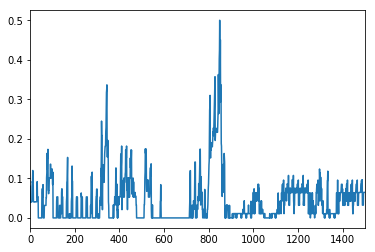

In [238]:
pd.Series(vAnomalyScore).plot()

# Redirecting Anomaly Score

Once an AS has been outputed, we want to know which are the cells the where unpredicted and causes the error to raise.

-------- 4 -----------  
Raw input vector  
0000010000 0010010000 0   

==== PY Iteration: 56 =====  
Previous learned pattern: array([ 0,  2,  4,  5, 19])  
  
Active cols: [ 5 12 15]  
Inference Active state  
0000000000 0000000000 0  
0000010000 0000010000 0  
0000000000 0010000000 0  
  
Inference Predicted state: [1, 7, 8, 14, 20]  
0000000000 0000000000 0  
0100000110 0000000000 1  
0000000000 0000100000 0  

In [202]:
tm.infPredictedState # [t] predicted to be active next, [t-1] predicted before, for current input 

{'backup': array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], dtype=int8), 'candidate': array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], dtype=int8), 't': array([[0, 0, 0],
        [0, 1, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 1, 

In [203]:
predictedCells = tm.getPredictedState()
print formatRow(predictedCells.max(axis=1).nonzero())

[ 1  7  8 14 20] 


In [198]:
tm.getPredictedState()

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 1, 0]], dtype=int8)

In [207]:
for c in xrange(tm.numberOfCols):
    for i in xrange(tm.cellsPerColumn):
        if not False or tm.infPredictedState['t'][c, i]:
            tm.printCell(c, i, False)

Column 0 Cell 1 : 2 segment(s)
   Seg #0   ID:10    True 0.1785714 (  10/10  )    3 [1,1]1.00 [1,2]0.50 [7,1]1.00 [8,1]1.00 [8,2]0.50 [14,1]0.50 [14,2]1.00 [20,1]1.00
   Seg #1   ID:36    True 0.0178571 (   1/1   )   23 [1,0]0.50 [7,0]0.50 [8,0]0.50 [14,0]0.50 [20,0]0.50
Column 0 Cell 2 : 1 segment(s)
   Seg #0   ID:23    True 0.1964286 (  11/11  )    1 [2,1]1.00 [10,1]1.00 [12,1]1.00 [16,2]1.00 [17,2]1.00 [20,1]1.00
Column 1 Cell 1 : 2 segment(s)
   Seg #0   ID:0     True 0.0178571 (   1/1   )   55
  *Seg #1   ID:31    True 0.1785714 (  10/11  )    4 [5,1]1.00 [12,2]1.00 [15,1]1.00
Column 1 Cell 2 : 1 segment(s)
   Seg #0   ID:5     True 0.0178571 (   1/10  )   54 [1,1]0.50 [7,2]0.50 [8,1]0.50 [14,1]0.50 [20,2]0.50
Column 2 Cell 1 : 3 segment(s)
   Seg #0   ID:11    True 0.1785714 (  10/10  )    3 [1,1]1.00 [1,2]0.50 [7,1]1.00 [8,1]1.00 [8,2]0.50 [14,1]0.50 [14,2]1.00 [20,1]1.00
   Seg #1   ID:17    True 0.1964286 (  11/11  )    2 [0,1]1.00 [2,1]1.00 [6,1]1.00 [11,1]0.50 [11,2]1.00 [1

# Trackability - Feedforward

In [37]:
track

[{'inputSDR': array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8),
  'inputVal': 73.96732207,
  'sp_active': 0},
 {'inputSDR': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8),
  'inputVal': 74.93588199999998,
  'sp_active': 2},
 {'inputSDR': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=uint8),
  'inputVal': 76.12416182,
  'sp_active': 1},
 {'inputSDR': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0], dtype=uint8),
  'inputVal': 78.14070732,
  'sp_active': 2},
 {'inputSDR': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0], dtype=uint8),
  'inputVal': 79.32983574,
  'sp_active': 3}]

The input SDR can be Decoded up to a certain granularity.

In [38]:
track[0]['inputVal']

73.96732207

In [39]:
vEnc.decode(track[0]['inputSDR'])

({'[70:80]': ([[73.888888888888886, 73.888888888888886]], '73.89')},
 ['[70:80]'])

Feed SP with `sp.compute(track[i]['inputSDR'], learn=True, activeArray=output)`,  
and then the *Temporal Pooler* `inputSDR[track[i]['sp_active']]` = active columns in TM

# Trackability - Backwards

Generate *TM output* by feeding in the active columns of the *SP*.

In [45]:
spSDR[track[0]['sp_active']]

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [51]:
tm.compute(spSDR[track[0]['sp_active']], enableLearn=True, enableInference=True)

array([ 0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,
        0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.], dtype=float32)

In [53]:
# return index for ACTIVE columns in TM: 
tmActive = []

for i in range(tm.infActiveState['t'].shape[0]):
    # assign 1 if any 1 (active cell) in the column,
    # 0 otherwise
    if np.any(tm.infActiveState['t'][i]>0):
        tmActive.append(1)
    else:
        tmActive.append(0)
# return index of active Columns        
tm_active = np.flatnonzero(np.array(tmActive))
del(tmActive) # delete list

In [48]:
tm_active

array([ 1,  7,  8, 14, 20])

Build `spSDR[track[0]['sp_active']]` back:

In [44]:
sp_active = np.zeros_like(spSDR[0])
sp_active[tm_active] = 1
sp_active

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

Find the corresponding column in spSDR:

In [404]:
idx = []
for _ in spSDR:
    i =+ 1
    if np.array_equal(sp_active, spSDR[_]) == True:
        idx.append(i)
print "matching spSDR:", idx

matching spSDR: [1]


In [405]:
# calculate with which inputSDR, the active SP col has the higher overlap: 


for j in idx:
    overlap = []
    for i in xrange(len(track)):
        overlap.append(sum(track[i]['inputSDR'] * spSDR[j]))
        o = last_max_index(overlap)
        
    print "overlap: ", str(overlap) +  "\nInputSDR[idx]: ", str(o)
    print "inputSDR: ", str(track[o]['inputSDR'])

overlap:  [0, 1, 2, 1, 0]
InputSDR[idx]:  2
inputSDR:  [0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]


This function should be useful in case we have ties in the overlap-score.

In [408]:
def match_back_SP_to_SDR(lista):
    '''
    This fnc returns the indeces of the InputSDR/s that match 
    (have the highest overalpping score) the current SP the most.
    
    input:  copy of a list `list[:]` with the overlap score bw. 
            the winning spSDR[i] and the inputSDR[0:]   
    output: 'match', a list, indeces of InputSDR in `track`
    '''
    
    a = max(lista)
    b = a
    match = []
    count = 0

    while b == a:
        i = lista.index(b)
        out = lista.pop(i)
        i = i+count  # fill the indexes popped out
        match.append(i)
        count += 1
        b = max(lista)    
    
    return match

In [409]:
match_back_SP_to_SDR(overlap[:])

[2]

In [410]:
for i in match_back_SP_to_SDR(overlap[:]):
    print "inputVal[" + str(i) + "]: " + str(track[i]['inputVal'])
    print "De-Encoder: " + str(vEnc.decode(track[i]['inputSDR']))
    print "-------"

inputVal[2]: 76.12416182
De-Encoder: ({'[70:80]': ([[76.111111111111114, 76.111111111111114]], '76.11')}, ['[70:80]'])
-------


# Dataset Helpers

In [38]:
from pkg_resources import resource_filename

datasetPath = resource_filename("nupic.datafiles", "extra/hotgym/hotgym.csv")
print datasetPath

with open(datasetPath) as inputFile:
    print
    for _ in xrange(8):
        print inputFile.next().strip()

/Users/mleborgne/_git/nupic/src/nupic/datafiles/extra/hotgym/hotgym.csv

gym,address,timestamp,consumption
string,string,datetime,float
S,,T,
Balgowlah Platinum,Shop 67 197-215 Condamine Street Balgowlah 2093,2010-07-02 00:00:00.0,5.3
Balgowlah Platinum,Shop 67 197-215 Condamine Street Balgowlah 2093,2010-07-02 00:15:00.0,5.5
Balgowlah Platinum,Shop 67 197-215 Condamine Street Balgowlah 2093,2010-07-02 00:30:00.0,5.1
Balgowlah Platinum,Shop 67 197-215 Condamine Street Balgowlah 2093,2010-07-02 00:45:00.0,5.3
Balgowlah Platinum,Shop 67 197-215 Condamine Street Balgowlah 2093,2010-07-02 01:00:00.0,5.2


# Loading Data

`FileRecordStream` - file reader for the NuPIC file format (CSV with three header rows, understands datetimes)

In [39]:
from nupic.data.file_record_stream import FileRecordStream

def getData():
    return FileRecordStream(datasetPath)

data = getData()
for _ in xrange(5):
    print data.next()

['Balgowlah Platinum', 'Shop 67 197-215 Condamine Street Balgowlah 2093', datetime.datetime(2010, 7, 2, 0, 0), 5.3]
['Balgowlah Platinum', 'Shop 67 197-215 Condamine Street Balgowlah 2093', datetime.datetime(2010, 7, 2, 0, 15), 5.5]
['Balgowlah Platinum', 'Shop 67 197-215 Condamine Street Balgowlah 2093', datetime.datetime(2010, 7, 2, 0, 30), 5.1]
['Balgowlah Platinum', 'Shop 67 197-215 Condamine Street Balgowlah 2093', datetime.datetime(2010, 7, 2, 0, 45), 5.3]
['Balgowlah Platinum', 'Shop 67 197-215 Condamine Street Balgowlah 2093', datetime.datetime(2010, 7, 2, 1, 0), 5.2]


In [40]:
from nupic.frameworks.opf.model_factory import ModelFactory
model = ModelFactory.create(MODEL_PARAMS)
model.enableInference({'predictedField': 'consumption'})

In [41]:
data = getData()
for _ in xrange(100):
    record = dict(zip(data.getFieldNames(), data.next()))
    print "input: ", record["consumption"]
    result = model.run(record)
    print "prediction: ", result.inferences["multiStepBestPredictions"][1]

input:  5.3
prediction:  5.3
input:  5.5
prediction:  5.5
input:  5.1
prediction:  5.36
input:  5.3
prediction:  5.1
input:  5.2
prediction:  5.342
input:  5.5
prediction:  5.2994
input:  4.5
prediction:  5.35958
input:  1.2
prediction:  4.92
input:  1.1
prediction:  1.2
input:  1.2
prediction:  1.17
input:  1.2
prediction:  1.179
input:  1.2
prediction:  1.1853
input:  1.2
prediction:  1.18971
input:  1.2
prediction:  1.192797
input:  1.1
prediction:  1.1949579
input:  1.2
prediction:  1.16647053
input:  1.1
prediction:  1.176529371
input:  1.2
prediction:  1.1535705597
input:  1.2
prediction:  1.16749939179
input:  1.1
prediction:  1.17724957425
input:  1.2
prediction:  1.15407470198
input:  6.0
prediction:  1.16785229138
input:  7.9
prediction:  5.551706
input:  8.4
prediction:  6.2561942
input:  10.6
prediction:  6.89933594
input:  12.4
prediction:  10.6
input:  12.1
prediction:  12.4
input:  12.4
prediction:  12.31
input:  11.4
prediction:  12.337
input:  11.2
prediction:  10.84
i

In [42]:
print "5-step prediction: ", result.inferences["multiStepBestPredictions"][5]

5-step prediction:  1.19932370691


# Anomaly Score

In [43]:
# Model Params!
MODEL_PARAMS = {
    # Type of model that the rest of these parameters apply to.
    'model': "HTMPrediction",

    # Version that specifies the format of the config.
    'version': 1,

    # Intermediate variables used to compute fields in modelParams and also
    # referenced from the control section.
    'aggregationInfo': {   'days': 0,
        'fields': [('consumption', 'sum')],
        'hours': 1,
        'microseconds': 0,
        'milliseconds': 0,
        'minutes': 0,
        'months': 0,
        'seconds': 0,
        'weeks': 0,
        'years': 0},

    'predictAheadTime': None,

    # Model parameter dictionary.
    'modelParams': {
        # The type of inference that this model will perform
        'inferenceType': 'TemporalAnomaly',

        'sensorParams': {
            # Sensor diagnostic output verbosity control;
            # if > 0: sensor region will print out on screen what it's sensing
            # at each step 0: silent; >=1: some info; >=2: more info;
            # >=3: even more info (see compute() in py/regions/RecordSensor.py)
            'verbosity' : 0,

            # Include the encoders we use
            'encoders': {
                u'timestamp_timeOfDay': {
                    'fieldname': u'timestamp',
                    'name': u'timestamp_timeOfDay',
                    'timeOfDay': (21, 0.5),
                    'type': 'DateEncoder'},
                u'timestamp_dayOfWeek': None,
                u'timestamp_weekend': None,
                u'consumption': {
                    'clipInput': True,
                    'fieldname': u'consumption',
                    'maxval': 100.0,
                    'minval': 0.0,
                    'n': 50,
                    'name': u'c1',
                    'type': 'ScalarEncoder',
                    'w': 21},},

            # A dictionary specifying the period for automatically-generated
            # resets from a RecordSensor;
            #
            # None = disable automatically-generated resets (also disabled if
            # all of the specified values evaluate to 0).
            # Valid keys is the desired combination of the following:
            #   days, hours, minutes, seconds, milliseconds, microseconds, weeks
            #
            # Example for 1.5 days: sensorAutoReset = dict(days=1,hours=12),
            #
            # (value generated from SENSOR_AUTO_RESET)
            'sensorAutoReset' : None,
        },

        'spEnable': True,

        'spParams': {
            # SP diagnostic output verbosity control;
            # 0: silent; >=1: some info; >=2: more info;
            'spVerbosity' : 0,

            # Spatial Pooler implementation selector, see getSPClass
            # in py/regions/SPRegion.py for details
            # 'py' (default), 'cpp' (speed optimized, new)
            'spatialImp' : 'cpp',

            'globalInhibition': 1,

            # Number of cell columns in the cortical region (same number for
            # SP and TM)
            # (see also tpNCellsPerCol)
            'columnCount': 2048,

            'inputWidth': 0,

            # SP inhibition control (absolute value);
            # Maximum number of active columns in the SP region's output (when
            # there are more, the weaker ones are suppressed)
            'numActiveColumnsPerInhArea': 40,

            'seed': 1956,

            # potentialPct
            # What percent of the columns's receptive field is available
            # for potential synapses. At initialization time, we will
            # choose potentialPct * (2*potentialRadius+1)^2
            'potentialPct': 0.5,

            # The default connected threshold. Any synapse whose
            # permanence value is above the connected threshold is
            # a "connected synapse", meaning it can contribute to the
            # cell's firing. Typical value is 0.10. Cells whose activity
            # level before inhibition falls below minDutyCycleBeforeInh
            # will have their own internal synPermConnectedCell
            # threshold set below this default value.
            # (This concept applies to both SP and TM and so 'cells'
            # is correct here as opposed to 'columns')
            'synPermConnected': 0.1,

            'synPermActiveInc': 0.1,

            'synPermInactiveDec': 0.005,
        },

        # Controls whether TM is enabled or disabled;
        # TM is necessary for making temporal predictions, such as predicting
        # the next inputs.  Without TP, the model is only capable of
        # reconstructing missing sensor inputs (via SP).
        'tmEnable' : True,

        'tmParams': {
            # TM diagnostic output verbosity control;
            # 0: silent; [1..6]: increasing levels of verbosity
            # (see verbosity in nupic/trunk/py/nupic/research/TP.py and BacktrackingTMCPP.py)
            'verbosity': 0,

            # Number of cell columns in the cortical region (same number for
            # SP and TM)
            # (see also tpNCellsPerCol)
            'columnCount': 2048,

            # The number of cells (i.e., states), allocated per column.
            'cellsPerColumn': 32,

            'inputWidth': 2048,

            'seed': 1960,

            # Temporal Pooler implementation selector (see _getTPClass in
            # CLARegion.py).
            'temporalImp': 'cpp',

            # New Synapse formation count
            # NOTE: If None, use spNumActivePerInhArea
            #
            # TODO: need better explanation
            'newSynapseCount': 20,

            # Maximum number of synapses per segment
            #  > 0 for fixed-size CLA
            # -1 for non-fixed-size CLA
            #
            # TODO: for Ron: once the appropriate value is placed in TP
            # constructor, see if we should eliminate this parameter from
            # description.py.
            'maxSynapsesPerSegment': 32,

            # Maximum number of segments per cell
            #  > 0 for fixed-size CLA
            # -1 for non-fixed-size CLA
            #
            # TODO: for Ron: once the appropriate value is placed in TP
            # constructor, see if we should eliminate this parameter from
            # description.py.
            'maxSegmentsPerCell': 128,

            # Initial Permanence
            # TODO: need better explanation
            'initialPerm': 0.21,

            # Permanence Increment
            'permanenceInc': 0.1,

            # Permanence Decrement
            # If set to None, will automatically default to tpPermanenceInc
            # value.
            'permanenceDec' : 0.1,

            'globalDecay': 0.0,

            'maxAge': 0,

            # Minimum number of active synapses for a segment to be considered
            # during search for the best-matching segments.
            # None=use default
            # Replaces: tpMinThreshold
            'minThreshold': 9,

            # Segment activation threshold.
            # A segment is active if it has >= tpSegmentActivationThreshold
            # connected synapses that are active due to infActiveState
            # None=use default
            # Replaces: tpActivationThreshold
            'activationThreshold': 12,

            'outputType': 'normal',

            # "Pay Attention Mode" length. This tells the TM how many new
            # elements to append to the end of a learned sequence at a time.
            # Smaller values are better for datasets with short sequences,
            # higher values are better for datasets with long sequences.
            'pamLength': 1,
        },

        'clParams': {
            'regionName' : 'SDRClassifierRegion',

            # Classifier diagnostic output verbosity control;
            # 0: silent; [1..6]: increasing levels of verbosity
            'verbosity' : 0,

            # This controls how fast the classifier learns/forgets. Higher values
            # make it adapt faster and forget older patterns faster.
            'alpha': 0.005,

            # This is set after the call to updateConfigFromSubConfig and is
            # computed from the aggregationInfo and predictAheadTime.
            'steps': '1',

            'implementation': 'cpp',
        },

        'anomalyParams': {
            u'anomalyCacheRecords': None,
            u'autoDetectThreshold': None,
            u'autoDetectWaitRecords': 2184
        },

        'trainSPNetOnlyIfRequested': False,
    },
}

In [44]:
from nupic.frameworks.opf.model_factory import ModelFactory
model = ModelFactory.create(MODEL_PARAMS)
model.enableInference({'predictedField': 'consumption'})

In [45]:
data = getData()
for _ in xrange(5):
    record = dict(zip(data.getFieldNames(), data.next()))
    print "input: ", record["consumption"]
    result = model.run(record)
    print "prediction: ", result.inferences["multiStepBestPredictions"][1]

input:  5.3
prediction:  5.3
input:  5.5
prediction:  5.5
input:  5.1
prediction:  5.36
input:  5.3
prediction:  5.1
input:  5.2
prediction:  5.342


In [46]:
print result

ModelResult(	predictionNumber=4
	rawInput={'timestamp': datetime.datetime(2010, 7, 2, 1, 0), 'gym': 'Balgowlah Platinum', 'consumption': 5.2, 'address': 'Shop 67 197-215 Condamine Street Balgowlah 2093'}
	sensorInput=SensorInput(	dataRow=(5.2, 1.0)
	dataDict={'timestamp': datetime.datetime(2010, 7, 2, 1, 0), 'gym': 'Balgowlah Platinum', 'consumption': 5.2, 'address': 'Shop 67 197-215 Condamine Street Balgowlah 2093'}
	dataEncodings=[array([ 0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32), array([ 0.,  0.,  0., ...,  0.,  0.,  0.], dtype=float32)]
	sequenceReset=0.0
	category=-1
)
	inferences={'multiStepPredictions': {1: {5.1: 0.0088801263517415546, 5.2: 0.010775254623541418, 5.341999999999999: 0.98034461902471692}}, 'multiStepBucketLikelihoods': {1: {1

In [47]:
print "anomaly score: ", result.inferences["anomalyScore"]

anomaly score:  0.4


__See Subutai's talk for more info on anomaly detection!__

# Built-in OPF Clients

`python examples/opf/bin/OpfRunExperiment.py examples/opf/experiments/multistep/hotgym/`

Outputs `examples/opf/experiments/multistep/hotgym/inference/DefaultTask.TemporalMultiStep.predictionLog.csv`

`python bin/run_swarm.py examples/opf/experiments/multistep/hotgym/permutations.py`

Outputs `examples/opf/experiments/multistep/hotgym/model_0/description.py`